***Importing packages***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.metrics import accuracy_score

***Reading data***

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
type(iris.target)

numpy.ndarray

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


***Preprocessing data***

In [6]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = pd.Series(iris.target)

In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [10]:
y.unique()

array([0, 1, 2])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

***Fitting and Predicting***

In [13]:
svc_model = SVC(kernel='linear', C=1.0, random_state=0)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [14]:
pred = svc_model.predict(X_test)

***Visualizing results***

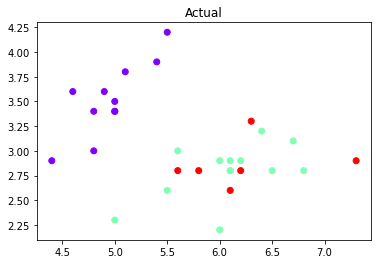

In [24]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test, cmap='rainbow')
plt.title('Actual')
plt.show()

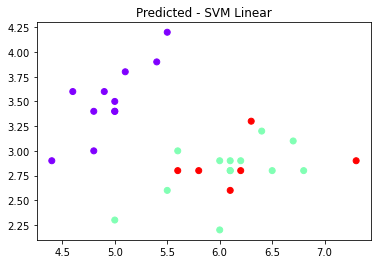

In [26]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=pred, cmap='rainbow')
plt.title('Predicted - SVM Linear')
plt.show()

In [27]:
rmse = np.sqrt(np.mean((pred - y_test)**2))
rmse

0.0

In [28]:
accuracy_score(y_test, pred)

1.0

***Parameterizing SVM***

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
              'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

In [31]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

In [32]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [33]:
svm_model1 = SVC(kernel='rbf', C=1.0, gamma=0.1, random_state=0)
svm_model1.fit(X_train, y_train)
pred1 = svm_model1.predict(X_test)
accuracy_score(y_test, pred1)

1.0